# 0. Описать задачу словами 

Датасет содержит различные характеристики музыкальных треков. Необходимо решить задачу классификации - предсказать жанр трека по представленным признакам.

# 1. Прочитать данные 

In [1]:
import warnings
warnings.filterwarnings('ignore')

Загружаем датасет

In [24]:
import pandas as pd
df = pd.read_csv("train.csv")
df.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10


Посмотрим основную информацию о загруженных данных

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17996 entries, 0 to 17995
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         17996 non-null  object 
 1   Track Name          17996 non-null  object 
 2   Popularity          17568 non-null  float64
 3   danceability        17996 non-null  float64
 4   energy              17996 non-null  float64
 5   key                 15982 non-null  float64
 6   loudness            17996 non-null  float64
 7   mode                17996 non-null  int64  
 8   speechiness         17996 non-null  float64
 9   acousticness        17996 non-null  float64
 10  instrumentalness    13619 non-null  float64
 11  liveness            17996 non-null  float64
 12  valence             17996 non-null  float64
 13  tempo               17996 non-null  float64
 14  duration_in min/ms  17996 non-null  float64
 15  time_signature      17996 non-null  int64  
 16  Clas

Общая структура DataFrame:
- Размер: 17,996 записей, 17 столбцов.
- Типы данных: 
  - object (2 столбца): Artist Name, Track Name
  - float64 (12 столбцов): такие как Popularity, danceability, energy и др.
  - int64 (3 столбца): mode, time_signature, Class
- Память: около 2.3 МБ.

Отсутствующие значения:
- Колонки с пропусками: Popularity, key, instrumentalness.

Потенциальные категориальные признаки:
- Artist Name и Track Name (из-за их object типа).
- Числовые признаки с небольшим числом уникальных значений тоже могут быть категориальными - mode и time_signature.

2. Визуализировать данные и вычислить основные характеристики (среднее, разброс, корреляционную матрицу и т.д.). Интерпретировать. 

In [26]:
print("Средние значения по столбцам:")
print(df.mean())

print("\nДисперсия по столбцам:")
print(df.var())

Средние значения по столбцам:
Popularity                44.512124
danceability               0.543433
energy                     0.662777
key                        5.952447
loudness                  -7.910660
mode                       0.636753
speechiness                0.079707
acousticness               0.247082
instrumentalness           0.177562
liveness                   0.196170
valence                    0.486208
tempo                    122.623294
duration_in min/ms    200744.458851
time_signature             3.924039
Class                      6.695821
dtype: float64

Дисперсия по столбцам:
Popularity            3.036978e+02
danceability          2.764521e-02
energy                5.540063e-02
key                   1.021988e+01
loudness              1.639562e+01
mode                  2.313116e-01
speechiness           6.984958e-03
acousticness          9.649239e-02
instrumentalness      9.244544e-02
liveness              2.534836e-02
valence               5.769376e-02
tempo 

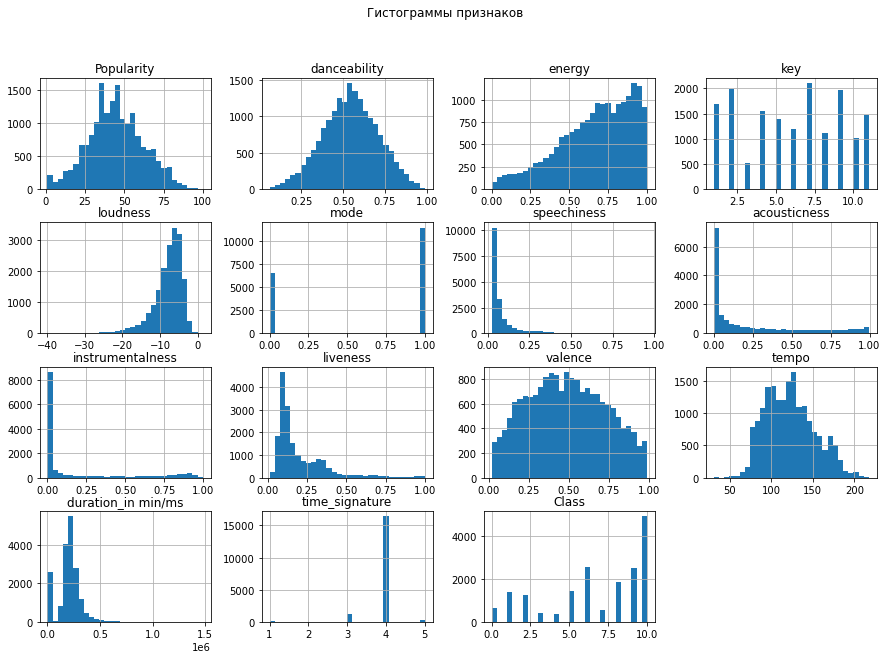

In [27]:
import matplotlib.pyplot as plt

df.hist(bins=30, figsize=(15, 10))
plt.suptitle('Гистограммы признаков')
plt.show()

In [28]:
# Вычисление количества уникальных значений для каждого столбца
unique_counts = df.apply(pd.Series.nunique)

print("Количество уникальных значений для каждого признака:")
print(unique_counts)

Количество уникальных значений для каждого признака:
Artist Name            9149
Track Name            15129
Popularity              100
danceability            909
energy                 1208
key                      11
loudness               9002
mode                      2
speechiness            1194
acousticness           3930
instrumentalness       4253
liveness               1459
valence                1320
tempo                 13562
duration_in min/ms    14121
time_signature            4
Class                    11
dtype: int64


Признаки Popularity и danceability имеют распределение, близкое к нормальному
Признаки key, mode, time_signature можно отнести к категориальным, т.к. они имеют малое количество уникальных значений

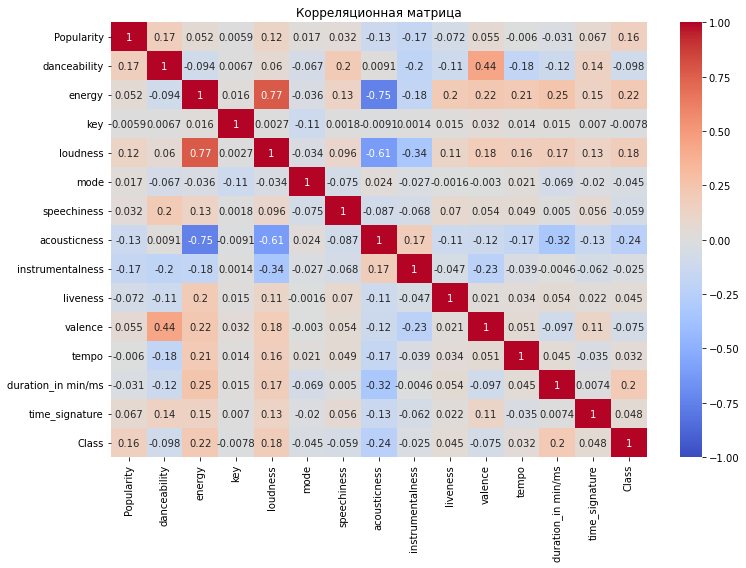

In [29]:
import seaborn as sns

corr_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Корреляционная матрица")
plt.show()

1. **energy и loudness (корреляция 0.767869):**
   - **Описание признаков:**
     - energy: Измеряет интенсивность и активность трека.
     - loudness: Средняя громкость трека, измеряемая в децибелах.
     
   - **Анализ связи**:
     - Между energy и loudness существует сильная положительная корреляция (0.767869). Это значит, что более энергичные треки, как правило, будут громче. Это интуитивно понятно, поскольку более интенсивные треки часто звучат громче.

2. **energy и acousticness (корреляция -0.745963):**
   - **Описание признаков:**
     - energy: Как описано выше, измеряет интенсивность и активность трека.
     - acousticness: Вероятность того, что трек является акустическим (высокие значения означают трек с акустическим характером).
   
   - **Анализ связи**:
     - Существует сильная отрицательная корреляция между energy и acousticness (-0.745963). Это указывает на то, что более энергичные треки, как правило, менее акустические. Такие результаты могут иметь значение для задач, связанных с категоризацией музыки по жанрам (например, соединить более "акустичные" треки с более расслабленными жанрами, а менее "акустичные" — с более динамичными).

3. Обработать пропущенные значения (или убедиться, что их нет) 

In [30]:
print("Количество пропущенных значений в каждом столбце:")
print(df.isnull().sum())

Количество пропущенных значений в каждом столбце:
Artist Name              0
Track Name               0
Popularity             428
danceability             0
energy                   0
key                   2014
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      4377
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
dtype: int64


Popularity (вещественный признак):
Замена средним значением: Хороший вариант, если пропуски случайны и данные нормально распределены.

In [31]:
df['Popularity'].fillna(df['Popularity'].mean(), inplace=True)

Распределение instrumentalness не похоже на нормальное - замена средним не лучший вариант

In [32]:
value_counts = df['instrumentalness'].value_counts()

# Получение 5-ти самых популярных значений
top_5_values = value_counts.head(5)

# Печать результатов
print("Пять самых популярных значений instrumentalness:")
print(top_5_values)

Пять самых популярных значений instrumentalness:
0.000109    20
0.929000    19
0.914000    18
0.892000    17
0.112000    17
Name: instrumentalness, dtype: int64


Видно, что замена самым популярным вариантом в данном случае тоже может работать не очень стабильно

In [33]:
number_of_bins = 400

# Разбиение данных на бины
binned_data = pd.cut(df['instrumentalness'], bins=number_of_bins)

# Подсчет частоты в каждом бине
bin_counts = binned_data.value_counts().sort_values(ascending=False)

# Получение 5-ти самых популярных бинов
top_5_bins = bin_counts.head(5)

# Печать результатов
print("Пять самых популярных бинов instrumentalness:")
print(top_5_bins)

Пять самых популярных бинов instrumentalness:
(-0.000995, 0.00249]    6420
(0.00249, 0.00498]       622
(0.00498, 0.00747]       327
(0.00747, 0.00996]       277
(0.00996, 0.0125]        214
Name: instrumentalness, dtype: int64


Исходя из этого, можно заменить все пропущенные значения нулями

In [34]:
df['instrumentalness'].fillna(0, inplace=True)

key принимает всего 11 значений, можно попробовать заменить пропущенные значения на самое популярное

In [35]:
print(df['key'].value_counts())

7.0     2097
2.0     1994
9.0     1961
1.0     1680
4.0     1549
11.0    1476
5.0     1397
6.0     1190
8.0     1119
10.0    1010
3.0      509
Name: key, dtype: int64


можно заметить, что нет какого-то доминирующего варианта, поэтому создадим для пропущенных значений отдельное значение - 0

In [36]:
df['key'].fillna(0., inplace=True)

In [37]:
print("Количество пропущенных значений в каждом столбце:")
print(df.isnull().sum())

Количество пропущенных значений в каждом столбце:
Artist Name           0
Track Name            0
Popularity            0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
duration_in min/ms    0
time_signature        0
Class                 0
dtype: int64


Пропущенных значений не осталось

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17996 entries, 0 to 17995
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         17996 non-null  object 
 1   Track Name          17996 non-null  object 
 2   Popularity          17996 non-null  float64
 3   danceability        17996 non-null  float64
 4   energy              17996 non-null  float64
 5   key                 17996 non-null  float64
 6   loudness            17996 non-null  float64
 7   mode                17996 non-null  int64  
 8   speechiness         17996 non-null  float64
 9   acousticness        17996 non-null  float64
 10  instrumentalness    17996 non-null  float64
 11  liveness            17996 non-null  float64
 12  valence             17996 non-null  float64
 13  tempo               17996 non-null  float64
 14  duration_in min/ms  17996 non-null  float64
 15  time_signature      17996 non-null  int64  
 16  Clas

Изменим тип у колонки key

In [39]:
print(df['key'].value_counts())

7.0     2097
0.0     2014
2.0     1994
9.0     1961
1.0     1680
4.0     1549
11.0    1476
5.0     1397
6.0     1190
8.0     1119
10.0    1010
3.0      509
Name: key, dtype: int64


In [40]:
df['key'] = df['key'].astype('int64')

In [41]:
print(df['key'].value_counts())

7     2097
0     2014
2     1994
9     1961
1     1680
4     1549
11    1476
5     1397
6     1190
8     1119
10    1010
3      509
Name: key, dtype: int64


4. Обработать категориальные признаки 

In [42]:
categorical_features = ['Artist Name', 'Track Name', 'mode', 'time_signature', 'key']
print("Категориальные признаки:")
print(categorical_features)

Категориальные признаки:
['Artist Name', 'Track Name', 'mode', 'time_signature', 'key']


Применим one-hot кодировку к каждому категориальному признаку

In [43]:
df = pd.get_dummies(df, columns=categorical_features, drop_first=False)
print(df.head())

   Popularity  danceability  energy  loudness  speechiness  acousticness  \
0        60.0         0.854   0.564    -4.964       0.0485      0.017100   
1        54.0         0.382   0.814    -7.230       0.0406      0.001100   
2        35.0         0.434   0.614    -8.334       0.0525      0.486000   
3        66.0         0.853   0.597    -6.528       0.0555      0.021200   
4        53.0         0.167   0.975    -4.279       0.2160      0.000169   

   instrumentalness  liveness  valence    tempo  ...  key_2  key_3  key_4  \
0          0.000000    0.0849   0.8990  134.071  ...      0      0      0   
1          0.004010    0.1010   0.5690  116.454  ...      0      1      0   
2          0.000196    0.3940   0.7870  147.681  ...      0      0      0   
3          0.000000    0.1220   0.5690  107.033  ...      0      0      0   
4          0.016100    0.1720   0.0918  199.060  ...      1      0      0   

   key_5  key_6  key_7  key_8  key_9  key_10  key_11  
0      0      0      0   

5. Провести нормализацию (или объяснить, почему в вашем случае она не нужна) 

Определим все вещественные признаки

In [44]:
all_columns = df.columns

# Определение one-hot закодированных колонок
one_hot_columns = [col for feature in categorical_features for col in all_columns if feature in col]

# Определение некатегориальных признаков, исключая колонку 'Class' и one-hot признаки
non_categorical_features = [col for col in all_columns if col not in one_hot_columns and col != 'Class']
print(non_categorical_features)

['Popularity', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_in min/ms']


In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[non_categorical_features] = scaler.fit_transform(df[non_categorical_features])

In [46]:
print("Средние значения по столбцам:")
print(df[non_categorical_features].mean())

print("\nДисперсия по столбцам:")
print(df[non_categorical_features].var())

Средние значения по столбцам:
Popularity            7.116878e-17
danceability         -4.880145e-16
energy                1.891253e-16
loudness              2.037342e-16
speechiness          -8.923242e-17
acousticness         -4.659038e-17
instrumentalness      5.606639e-17
liveness              8.725825e-17
valence              -1.437195e-16
tempo                -1.048283e-16
duration_in min/ms   -3.514020e-17
dtype: float64

Дисперсия по столбцам:
Popularity            1.000056
danceability          1.000056
energy                1.000056
loudness              1.000056
speechiness           1.000056
acousticness          1.000056
instrumentalness      1.000056
liveness              1.000056
valence               1.000056
tempo                 1.000056
duration_in min/ms    1.000056
dtype: float64


6. Разбить данные на обучающую и тестовую выборки 

In [47]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Class'])
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Размеры X_train: {X_train.shape}")
print(f"Размеры X_test: {X_test.shape}")
print(f"Размеры y_train: {y_train.shape}")
print(f"Размеры y_test: {y_test.shape}")

Размеры X_train: (14396, 24307)
Размеры X_test: (3600, 24307)
Размеры y_train: (14396,)
Размеры y_test: (3600,)


7. Запустить классификатор (регрессию) ближайших соседей или другой (аргументировать свой выбор) 

Из-за того что one-hot признаков получилось слишком много, knn будет обучаться долго, т.к. расстояние между объектами теперь считается слишком долго
И использовать knn для таких признаков не оптимально, попробуем деревья решений

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

tree_clf = DecisionTreeClassifier(random_state=42)

# Обучение модели на обучающей выборке
tree_clf.fit(X_train, y_train)

# Предсказание на обучающей выборке
y_train_pred = tree_clf.predict(X_train)

# Предсказание на тестовой выборке
y_test_pred = tree_clf.predict(X_test)

# Вычисление accuracy на обучении и тесте
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Accuracy на обучающей выборке: {train_accuracy:.2f}")
print(f"Accuracy на тестовой выборке: {test_accuracy:.2f}")

Accuracy на обучающей выборке: 0.92
Accuracy на тестовой выборке: 0.40


8. Подобрать оптимальное значение к-ва ближайших соседей (или другого релевантного гиперпараметра)

Попробуем подобрать параметры для дерева решений

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Инициализация классификатора
tree_clf = DecisionTreeClassifier(random_state=42)

param_grid = {
    'max_depth': [None, 10, 20],  # Максимальная глубина дерева
    'min_samples_split': [5, 10],  # Минимальное число образцов для расщепления узла
    'min_samples_leaf': [2, 4],    # Минимальное число образцов в листе
}

# Инициализация GridSearchCV
grid_search = GridSearchCV(
    estimator=tree_clf,
    param_grid=param_grid,
    cv=5,
    n_jobs=8,
    scoring='accuracy',
    verbose=2
)

# Обучение модели
grid_search.fit(X_train, y_train)

# Вывод лучших параметров и наилучшего результата
print(f"Лучшие параметры: {grid_search.best_params_}")
print(f"Лучшее значение кросс-валиидации: {grid_search.best_score_:.2f}")

# Оценка лучшей модели на тестовых данных
best_tree_clf = grid_search.best_estimator_
y_test_pred = best_tree_clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Accuracy на тестовой выборке: {test_accuracy:.2f}")

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Лучшие параметры: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Лучшее значение кросс-валиидации: 0.49
Accuracy на тестовой выборке: 0.49


9. Вычислить ошибки на обучающей и тестовой выборках. Сделать выводы 

In [35]:
y_train_pred = best_tree_clf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Предсказания для тестовой выборки
y_test_pred = best_tree_clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Accuracy на обучающей выборке: {train_accuracy:.2f}")
print(f"Accuracy на тестовой выборке: {test_accuracy:.2f}")

Accuracy на обучающей выборке: 0.58
Accuracy на тестовой выборке: 0.49


С помощью подбора параметров удалось улучшить качество и модель теперь так не переобучается

10. Запустить другие классификаторы и выбрать параметры. Выбрать релевантные! Сравнить результаты 

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Определение сокращенной сетки гиперпараметров для случайного леса
param_grid_rf = {
    'n_estimators': [5, 10, 15],   # Количество деревьев
}

# Инициализация случайного леса
rf_clf = RandomForestClassifier(max_depth=20, random_state=42)

# Инициализация GridSearchCV
grid_search_rf = GridSearchCV(
    estimator=rf_clf,
    param_grid=param_grid_rf,
    cv=3,
    scoring='accuracy',
    verbose=2
)

# Обучение
grid_search_rf.fit(X_train, y_train)

print(f"Лучшие параметры для случайного леса: {grid_search_rf.best_params_}")
print(f"Лучшее значение кросс-валидации для случайного леса: {grid_search_rf.best_score_:.2f}")

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] END .....................................n_estimators=5; total time=   1.7s
[CV] END .....................................n_estimators=5; total time=   1.6s
[CV] END .....................................n_estimators=5; total time=   1.6s
[CV] END ....................................n_estimators=10; total time=   1.8s
[CV] END ....................................n_estimators=10; total time=   1.9s
[CV] END ....................................n_estimators=10; total time=   1.9s
[CV] END ....................................n_estimators=15; total time=   2.1s
[CV] END ....................................n_estimators=15; total time=   2.0s
[CV] END ....................................n_estimators=15; total time=   2.1s
Лучшие параметры для случайного леса: {'n_estimators': 5}
Лучшее значение кросс-валидации для случайного леса: 0.32


11. как-то побороться с несбалансированностью классов (если она есть) 

Попытаем сбалансировать классы с помощью параметра class_weight

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Инициализация классификатора
tree_clf = DecisionTreeClassifier(class_weight='balanced', random_state=42)

param_grid = {
    'max_depth': [None, 10, 20],  # Максимальная глубина дерева
    'min_samples_split': [5, 10],  # Минимальное число образцов для расщепления узла
    'min_samples_leaf': [2, 4],    # Минимальное число образцов в листе
}

# Инициализация GridSearchCV
grid_search = GridSearchCV(
    estimator=tree_clf,
    param_grid=param_grid,
    cv=5,
    n_jobs=8,
    scoring='accuracy',
    verbose=2
)

# Обучение модели
grid_search.fit(X_train, y_train)

# Вывод лучших параметров и наилучшего результата
print(f"Лучшие параметры: {grid_search.best_params_}")
print(f"Лучшее значение кросс-валиидации: {grid_search.best_score_:.2f}")

# Оценка лучшей модели на тестовых данных
best_tree_clf = grid_search.best_estimator_
y_test_pred = best_tree_clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Accuracy на тестовой выборке: {test_accuracy:.2f}")

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Лучшие параметры: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}
Лучшее значение кросс-валиидации: 0.42
Accuracy на тестовой выборке: 0.41
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5; total time=  12.9s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=5; total time=   8.6s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5; total time=   8.0s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10; total time=   8.1s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10; total time=   7.9s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=10; total time=   8.1s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5; total time=   8.1s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10; total time=  12.9s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=5; total time=   8.5s
[CV] END max_depth=10, 

качество понизилось

12. исключить коррелированные переменные (объяснить зачем) 

Исключение коррелированных признаков часто помогает уменьшить избыточность, так как они предоставляют схожую информацию. Удаление таких признаков делает модель проще и более интерпретируемой. Это также может снизить риск переобучения за счет уменьшения сложности модели и убрать проблемы мультиколлинеарности в линейных моделях. Уменьшение числа признаков приводит к более эффективным вычислениям, сокращая время и ресурсы, необходимые для обучения. Однако, для моделей как случайный лес, коррелированные признаки могут не быть проблемой из-за их устойчивости к корреляции.

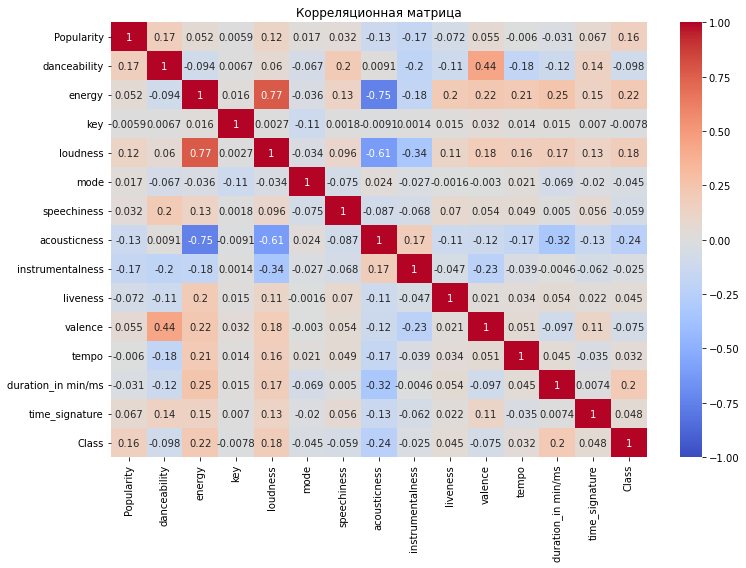

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Корреляционная матрица")
plt.show()

In [49]:
to_drop = ["acousticness", "loudness"]
df_reduced = df.drop(columns=to_drop)

X = df.drop(columns='Class')  # Все, кроме целевого признака
y = df['Class']  # Целевой признак

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)  # 20% — для тестовой выборки, random_state для воспроизводимости

In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

# Инициализация классификатора
tree_clf = DecisionTreeClassifier(random_state=42)

param_grid = {
    'max_depth': [None, 10, 20],  # Максимальная глубина дерева
    'min_samples_split': [5, 10],  # Минимальное число образцов для расщепления узла
    'min_samples_leaf': [2, 4],    # Минимальное число образцов в листе
}

# Инициализация GridSearchCV
grid_search = GridSearchCV(
    estimator=tree_clf,
    param_grid=param_grid,
    cv=5,
    n_jobs=8,
    scoring='accuracy',
    verbose=2
)

# Обучение модели
grid_search.fit(X_train, y_train)

# Вывод лучших параметров и наилучшего результата
print(f"Лучшие параметры: {grid_search.best_params_}")
print(f"Лучшее значение кросс-валиидации: {grid_search.best_score_:.2f}")

# Оценка лучшей модели на тестовых данных
best_tree_clf = grid_search.best_estimator_
y_test_pred = best_tree_clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Accuracy на тестовой выборке: {test_accuracy:.2f}")

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Лучшие параметры: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Лучшее значение кросс-валиидации: 0.49
Accuracy на тестовой выборке: 0.49
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5; total time=   9.3s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=5; total time=   7.6s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5; total time=   7.0s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10; total time=   7.3s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10; total time=   7.0s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=10; total time=   7.0s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5; total time=   7.3s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5; total time=   9.2s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=5; total time=   7.5s
[CV] END max_depth=10, 

13. Сделать общие выводы

## Выводы

Мы загрузили датасет и тщательно изучили данные. Обнаружив пропущенные значения в некоторых колонках, мы заполнили их наиболее подходящими методами. Категориальные признаки были обработаны с использованием one-hot кодирования, а вещественные признаки нормализованы.

Датасет был разделен на 80% для обучения и 20% для тестирования. Мы обучили дерево решений и смогли улучшить его качество, оптимизируя параметры. Другие опробованные классификаторы не дали улучшения в качестве.

Попытка сбалансировать классы привела к ухудшению качества на тестовых данных. Исключение коррелированных признаков не изменило качество, но и не ухудшило его.